# Preparing data for modeling


In [2]:
from sklearn.model_selection import TimeSeriesSplit
import pandas as pd
import numpy as np
import scipy as sp
import pickle

In [3]:
DATASET = 'data/4_final_dataset/final_dataset.csv'
ISW_DATA = 'data/4_final_dataset/isw_final.csv'

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
df = pd.read_csv(DATASET, sep=';')
df.head(10)

,city_resolvedAddress,day_datetime,day_datetimeEpoch,day_tempmax,day_tempmin,day_temp,day_dew,day_humidity,day_precip,day_precipcover,day_solarradiation,day_solarenergy,day_uvindex,day_sunrise,day_sunset,day_moonphase,hour_datetime,hour_datetimeEpoch,hour_temp,hour_humidity,hour_dew,hour_precip,hour_precipprob,hour_snow,hour_snowdepth,hour_preciptype,hour_windgust,hour_windspeed,hour_winddir,hour_pressure,hour_visibility,hour_cloudcover,hour_solarradiation,hour_solarenergy,hour_uvindex,hour_severerisk,hour_conditions,city,region,center_city_ua,center_city_en,region_alt,region_id,event_region_title,event_region_city,event_all_region,event_start,event_end,event_clean_end,event_intersection_alarm_id,event_start_time,event_end_time,event_start_hour,event_end_hour,event_day_date,event_start_hour_datetimeEpoch,event_end_hour_datetimeEpoch,event_hour_level_event_time,event_hour_level_event_datetimeEpoch,is_alarm
0,"Луцьк, Луцький район, Україна",2022-02-24,1645653600,4.9,0.7,2.6,0.0,83.7,0.118,4.17,36.9,2.8,1.0,07:13:36,17:51:06,0.77,00:00:00,1645653600,2.4,89.18,0.8,0.000,0.0,0.1,0.2,['snow'],31.3,15.5,275.6,1020.0,0.0,91.5,0.0,NaN,0.0,10.0,Overcast,Луцьк,Волинська,Луцьк,Lutsk,Волинь,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1,"Луцьк, Луцький район, Україна",2022-02-24,1645653600,4.9,0.7,2.6,0.0,83.7,0.118,4.17,36.9,2.8,1.0,07:13:36,17:51:06,0.77,01:00:00,1645657200,2.4,87.90,0.6,0.000,0.0,0.0,0.2,['snow'],27.7,14.8,280.3,1021.0,0.2,88.2,0.0,NaN,0.0,10.0,Partially cloudy,Луцьк,Волинська,Луцьк,Lutsk,Волинь,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2,"Луцьк, Луцький район, Україна",2022-02-24,1645653600,4.9,0.7,2.6,0.0,83.7,0.118,4.17,36.9,2.8,1.0,07:13:36,17:51:06,0.77,02:00:00,1645660800,2.9,88.58,1.2,0.000,0.0,0.0,0.1,['snow'],29.2,14.4,310.0,1022.0,10.0,100.0,NaN,NaN,NaN,10.0,Overcast,Луцьк,Волинська,Луцьк,Lutsk,Волинь,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
3,"Луцьк, Луцький район, Україна",2022-02-24,1645653600,4.9,0.7,2.6,0.0,83.7,0.118,4.17,36.9,2.8,1.0,07:13:36,17:51:06,0.77,03:00:00,1645664400,2.3,86.63,0.3,0.000,0.0,0.0,0.1,['snow'],23.8,13.3,295.1,1021.0,0.1,92.0,0.0,NaN,0.0,10.0,Overcast,Луцьк,Волинська,Луцьк,Lutsk,Волинь,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
4,"Луцьк, Луцький район, Україна",2022-02-24,1645653600,4.9,0.7,2.6,0.0,83.7,0.118,4.17,36.9,2.8,1.0,07:13:36,17:51:06,0.77,04:00:00,1645668000,1.9,87.85,0.1,0.000,0.0,0.0,0.1,['snow'],24.5,13.3,305.8,1021.0,0.0,93.8,0.0,NaN,0.0,10.0,Overcast,Луцьк,Волинська,Луцьк,Lutsk,Волинь,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
5,"Луцьк, Луцький район, Україна",2022-02-24,1645653600,4.9,0.7,2.6,0.0,83.7,0.118,4.17,36.9,2.8,1.0,07:13:36,17:51:06,0.77,05:00:00,1645671600,1.9,91.66,0.6,0.000,0.0,0.0,0.1,NaN,23.4,10.8,296.0,1022.5,10.0,100.0,0.0,NaN,0.0,10.0,Overcast,Луцьк,Волинська,Луцьк,Lutsk,Волинь,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
6,"Луцьк, Луцький район, Україна",2022-02-24,1645653600,4.9,0.7,2.6,0.0,83.7,0.118,4.17,36.9,2.8,1.0,07:13:36,17:51:06,0.77,06:00:00,1645675200,2.0,93.09,1.0,0.000,0.0,0.0,0.1,['snow'],20.9,10.8,300.0,1021.0,10.0,100.0,0.0,NaN,0.0,10.0,Overcast,Луцьк,Волинська,Луцьк,Lutsk,Волинь,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
7,"Луцьк, Луцький район, Україна",2022-02-24,1645653600,4.9,0.7,2.6,0.0,83.7,0.118,4.17,36.9,2.8,1.0,07:13:36,17:51:06,0.77,07:00:00,1645678800,2.0,93.09,1.0,0.000,0.0,0.0,0.1,['snow'],19.1,10.8,300.0,1022.0,10.0,100.0,0.0,NaN,0.0,10.0,Overcast,Луцьк,Волинська,Луцьк,Lutsk,Волинь,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
8,"Луцьк, Луцький район, Україна",2022-02-24,1645653600,4.9,0.7,2.6,0.0,83.7,0.118,4.17,36.9,2.8,1.0,07:13:36,17:51:06,0.77,08:00:00,1645682400,1.8,91.32,0.6,0.118,100.0,0.0,0.1,['snow'],16.9,7.2,303.0,1024.2,4.4,100.0,NaN,NaN,NaN,10.0,"Snow, Overcast",Луцьк,Волинська,Л

## ISW Data Prep

In [6]:
df_isw = pd.read_csv(ISW_DATA)

In [7]:
df_isw = df_isw.drop(columns={
    'report_date',
    'keywords'
})

In [8]:
df_isw.head(2)

,text_lemm,following_date
0,russian president vladimir putin began large s...,2022-02-25
1,russian force entered major ukrainian cities—i...,2022-02-26


In [9]:
df_merged = pd.merge(df, 
                     df_isw, 
                     left_on='day_datetime', 
                     right_on='following_date')

In [10]:
df_merged['datetime'] = pd.to_datetime(
    df_merged['day_datetime'].str.cat(
        df_merged['hour_datetime'], 
        sep=' '))

In [11]:
df_merged = df_merged.sort_values('datetime', ignore_index=True)

In [12]:
exclude = {
    'day_tempmax',
    'day_tempmin',
    'day_precipcover',
    'day_temp', 
    'day_dew', 
    'day_humidity',
    'day_precip',
    'day_precipcover', 
    'day_solarradiation',
    'day_solarenergy', 
    'day_uvindex',
    'day_moonphase', 
    'city_resolvedAddress',
    'day_datetimeEpoch',
    'datetime',
    'day_datetime',
    'hour_datetime',
    'hour_datetimeEpoch',
    'day_sunrise',
    'day_sunset',
    'hour_preciptype',
    'hour_conditions',
    'hour_solarenergy',
    'day_solarenergy',
    'city',
    'center_city_ua',
    'center_city_en',
    'region_alt',
    'event_region_title',
    'event_region_city',
    'event_all_region',
    'event_start',
    'event_end',
    'event_clean_end',
    'event_intersection_alarm_id',
    'event_start_time',
    'event_end_time',
    'event_start_hour',
    'event_end_hour',
    'event_day_date',
    'event_start_hour_datetimeEpoch',
    'event_end_hour_datetimeEpoch',
    'event_hour_level_event_time',
    'event_hour_level_event_datetimeEpoch',
    'region',
    'following_date'
}

In [13]:
df_merged = df_merged.drop(columns=exclude)

In [14]:
df_merged.head(10)

,hour_temp,hour_humidity,hour_dew,hour_precip,hour_precipprob,hour_snow,hour_snowdepth,hour_windgust,hour_windspeed,hour_winddir,hour_pressure,hour_visibility,hour_cloudcover,hour_solarradiation,hour_uvindex,hour_severerisk,region_id,is_alarm,text_lemm
0,0.3,82.68,-2.3,0.0,0.0,0.0,0.0,25.6,14.4,171.2,1019.0,24.1,100.0,0.0,0.0,10.0,3,False,russian president vladimir putin began large s...
1,-0.7,88.26,-2.4,0.0,0.0,0.0,0.1,21.2,12.6,166.4,1021.0,24.1,0.0,0.0,0.0,10.0,19,False,russian president vladimir putin began large s...
2,3.1,71.78,-1.5,0.0,0.0,0.0,0.0,19.8,13.3,17.8,1021.0,24.1,100.0,0.0,0.0,10.0,21,False,russian president vladimir putin began large s...
3,-0.2,89.61,-1.7,0.0,0.0,0.0,0.0,8.6,5.0,95.8,1024.0,24.1,15.2,0.0,0.0,10.0,23,False,russian president vladimir putin began large s...
4,0.5,85.81,-1.6,0.0,0.0,0.0,0.0,10.8,6.5,171.8,1023.0,24.1,0.0,0.0,0.0,10.0,6,False,russian president vladimir putin began large s...
5,-0.6,83.80,-3.0,0.0,0.0,0.0,0.0,11.9,6.5,50.5,1025.0,24.1,94.9,0.0,0.0,10.0,16,False,russian president vladimir putin began large s...
6,0.3,83.91,-2.1,0.0,0.0,0.0,0.0,19.4,11.5,163.6,1020.0,24.1,0.0,0.0,0.0,10.0,17,False,russian president vladimir putin began large s...
7,-0.6,88.46,-2.2,0.0,0.0,0.0,0.0,21.6,10.9,158.0,1023.2,10.0,0.0,0.0,0.0,10.0,24,False,russian president vladimir putin began large s...
8,-0.8,71.00,-5.4,0.0,0.0,0.0,3.9,7.2,4.0,99.6,1026.0,24.1,0.0,0.0,0.0,10.0,18,False,russian president vladimir putin began large s...
9,2.5,82.96,-0.1,0.0,0.0,0.0,0.0,22.0,11.9,34.5,1022.0,24.1,100.0,0.0,0.0,10.0,8,False,russian president vladimir putin began large s...


In [15]:
y = df_merged['is_alarm']
df_merged = df_merged.drop(columns={'is_alarm'})
df_merged = df_merged.fillna(method='ffill')

In [16]:
nans_per_column = df_merged.isna().sum(axis=0)
nans_per_column

hour_temp              0
hour_humidity          0
hour_dew               0
hour_precip            0
hour_precipprob        0
hour_snow              0
hour_snowdepth         0
hour_windgust          0
hour_windspeed         0
hour_winddir           0
hour_pressure          0
hour_visibility        0
hour_cloudcover        0
hour_solarradiation    0
hour_uvindex           0
hour_severerisk        0
region_id              0
text_lemm              0
dtype: int64

In [17]:
df_merged.shape

(198685, 18)

## Chunking the Data & Concatenating TF-IDF Vectors to the Final Dataset

In [18]:
tfidf = pickle.load(open('data/3_isw_vectorized_data/tfidf_transformer.pkl', 'rb'))
cv = pickle.load(open('data/3_isw_vectorized_data/cv.pkl', 'rb'))

In [19]:
chunks = np.array_split(df_merged, 100)

In [20]:
X = sp.sparse.csr_matrix((0, 9360), dtype=float)

for chunk in chunks:
    cv_vector = cv.transform(chunk['text_lemm'].values.astype('U'))
    tfidf_vec = tfidf.transform(cv_vector)
    chunk = chunk.drop(columns={'text_lemm'})
    chunk_csr = sp.sparse.csr_matrix(chunk.values.astype(float))
    chunk_merged = sp.sparse.hstack((chunk_csr, tfidf_vec), format='csr')
    X = sp.sparse.vstack((X, chunk_merged))

In [21]:
X.shape

(198685, 9360)

## Separating Data 
#### using `sklearn.model_selection.TimeSeriesSplit`

In [22]:
tscv = TimeSeriesSplit()

for train_index, test_index in tscv.split(X):
    X_train, X_test = X[train_index, :], X[test_index, :]
    y_train, y_test = y[train_index], y[test_index]

### Saving Train/Test matrices for later reuse

In [96]:
# y_test = sp.sparse.csr_matrix(y_test).T
# y_train = sp.sparse.csr_matrix(y_train).T

In [102]:
# train = sp.sparse.hstack([X_train, y_train])
# test = sp.sparse.hstack([X_test, y_test])

In [109]:
# sp.sparse.save_npz('data/5_train_test/train.npz', train)
# sp.sparse.save_npz('data/5_train_test/test.npz', test)

<hr style="border-color:black">


# Model Training

In [23]:
from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [141]:
from sklearn.linear_model import LogisticRegression, Perceptron, Ridge
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import SGDClassifier, PassiveAggressiveClassifier
from sklearn.neighbors import NearestCentroid, KNeighborsClassifier

### Model 1 | Logistic Regression

In [ ]:
logreg = LogisticRegression(solver='saga')
logreg.fit(X_train, y_train)

In [40]:
with open('models/2__logistic_regression__v2.pkl', 'wb') as f:
    pickle.dump(logreg, f)

### Model 2 | Support Vector Machines

*We tried training the* `SVC` *scikit-learn implementation of SVM with varying values of hyperparameters, but the training lasted for days, hence* `LinearSVC`

In [ ]:
svc = SVC()
svc.fit(X_train, y_train)

In [133]:
with open('models/2__linear_svc__v0.pkl', 'wb') as f:
    pickle.dump(lsvc, f)

### Model 3 | Stochastic Gradient Descent

In [ ]:
sgdc = SGDClassifier()
sgdc.fit(X_train, y_train)

In [146]:
with open('models/2__sgd_classifier__v2.pkl', 'wb') as f:
    pickle.dump(sgdc, f)

### Model 4 | Forests of randomized trees

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

In [ ]:
with open('models/2__random_forest_classifier__v0.pkl', 'wb') as f:
    pickle.dump(rfc, f)

### Model 5 | Gradient Boosting Classifier

In [ ]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)

In [42]:
with open('models/2__gradient_boosting_classifier__v0.pkl', 'wb') as f:
    pickle.dump(gbc, f)

### Model 6 | Passive Agressive Classifier

In [43]:
pac = PassiveAggressiveClassifier(C=2.1215811226877102e-05, 
                                  max_iter=3000, 
                                  tol=8.168455894760164e-05, 
                                  n_jobs=-1, random_state=42)
pac.fit(X_train, y_train)

PassiveAggressiveClassifier(C=2.1215811226877102e-05, max_iter=3000, n_jobs=-1,
                            random_state=42, tol=8.168455894760164e-05)

In [147]:
with open('models/2__passive_agressive_classifier__v2.pkl', 'wb') as f:
    pickle.dump(pac, f)

### Model 7 | Perceptron

In [124]:
perceptron = Perceptron(alpha=0.007459343285726546, 
                        tol=0.45705630998014524, 
                        eta0=2.933445395788399, random_state=42,
                        class_weight='balanced')
perceptron.fit(X_train, y_train)

Perceptron(alpha=0.007459343285726546, class_weight='balanced',
           eta0=2.933445395788399, random_state=42, tol=0.45705630998014524)

In [ ]:
with open('models/2__perceptron__v1.pkl', 'wb') as f:
    pickle.dump(pac, f)

### Model 8 | Nearest Centroid 

In [74]:
nc = NearestCentroid(metric='manhattan')
nc.fit(X_train, y_train)

NearestCentroid(metric='manhattan')

In [75]:
with open('models/2__nearest_centroid__v1.pkl', 'wb') as f:
    pickle.dump(nc, f)

### Model 9 | AdaBoostClassifier

In [138]:
abc = AdaBoostClassifier(algorithm='SAMME')
abc.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME')

<hr style="border-color:black">

# Model Evaluation



In [27]:
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
import sklearn.metrics

In [28]:
def get_scores(y_pred, model_name):
    df_scores = pd.DataFrame.from_dict(data={
    'Accuracy': [metrics.accuracy_score(y_test, y_pred)],
    'Precision': [metrics.precision_score(y_test, y_pred)],
    'Recall': [metrics.recall_score(y_test, y_pred)],
    'F1 Score': [metrics.f1_score(y_test, y_pred)],
    'AUC_ROC': [metrics.roc_auc_score(y_test, y_pred)]
    }, orient='index')
    df_scores = df_scores.rename(columns={0: model_name})
    return df_scores

### Model 1 | Logistic Regression

In [141]:
y_predicted_logreg = logreg.predict(X_test)
get_scores(y_predicted_logreg, 'Logistic Regression')

,Logistic Regression
Accuracy,0.820801
Precision,0.325611
Recall,0.093843
F1 Score,0.145695
AUC_ROC,0.528019


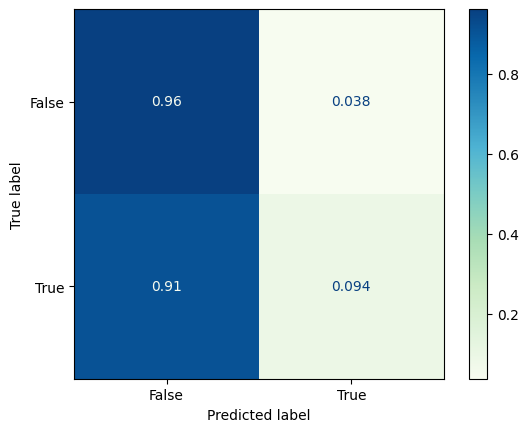

In [142]:
ConfusionMatrixDisplay.from_predictions(y_test, y_predicted_logreg, 
                                        im_kw={'cmap':'GnBu'}, 
                                        normalize='true')
plt.show()

### Model 2 | Support Vector Machines

In [130]:
y_predicted_lsvc = lsvc.predict(X_test)
get_scores(y_predicted_lsvc, 'Linear Support Vector Machines Classifier')

,Linear Support Vector Machines Classifier
Accuracy,0.569469
Precision,0.307968
Recall,0.996354
F1 Score,0.470506
AUC_ROC,0.732198


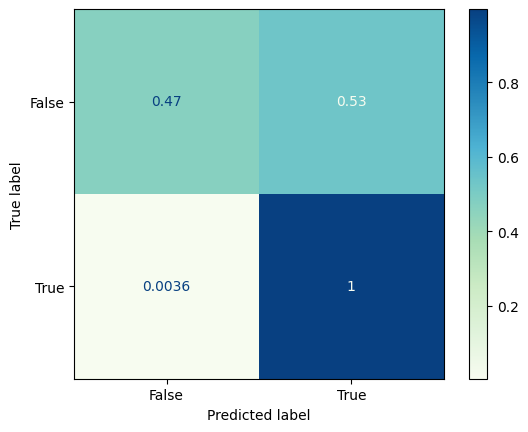

In [132]:
ConfusionMatrixDisplay.from_predictions(y_test, y_predicted_lsvc, 
                                        im_kw={'cmap':'GnBu'}, 
                                        normalize='true')
plt.show()

### Model 3 | Stochastic Gradient Descent

In [144]:
y_predicted_sgdc = sgdc.predict(X_test)
get_scores(y_predicted_sgdc, 'Stochastic Gradient Descent Classifier')

,Stochastic Gradient Descent Classifier
Accuracy,0.838407
Precision,0.632258
Recall,0.018175
F1 Score,0.035334
AUC_ROC,0.508059


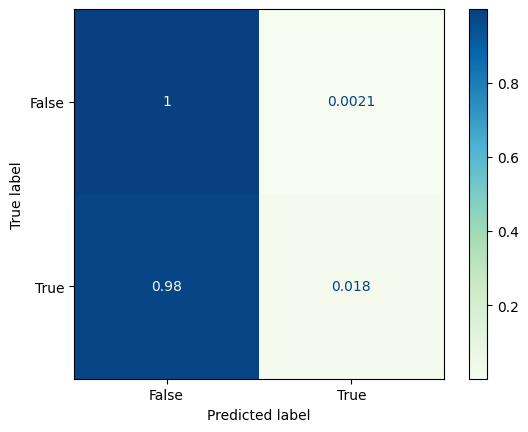

In [145]:
ConfusionMatrixDisplay.from_predictions(y_test, y_predicted_sgdc, 
                                        im_kw={'cmap':'GnBu'}, 
                                        normalize='true')
plt.show()

### Model 4 | Forests of randomized trees

In [47]:
y_predicted_rfc = rfc.predict(X_test)
get_scores(y_predicted_rfc, 'Random Forest Classifier')

,Random Forest Classifier
Accuracy,0.812061
Precision,0.975610
Recall,0.021607
F1 Score,0.042278
AUC_ROC,0.510739


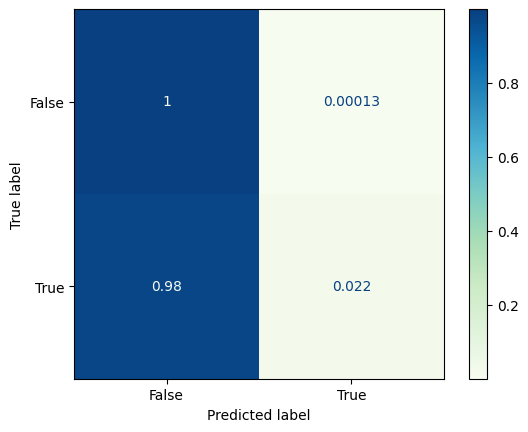

In [48]:
ConfusionMatrixDisplay.from_predictions(y_test, y_predicted_rfc, 
                                        im_kw={'cmap':'GnBu'}, 
                                        normalize='true')
plt.show()

### Model 5 | Gradient Boosting Classifier

In [52]:
y_predicted_gbc = gbc.predict(X_test)
get_scores(y_predicted_gbc, 'Gradient Boosting Classifier')

,Gradient Boosting Classifier
Accuracy,0.837138
Precision,0.454545
Recall,0.000927
F1 Score,0.001851
AUC_ROC,0.500355


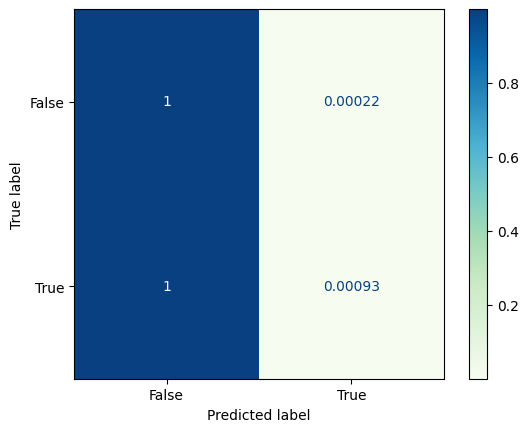

In [53]:
ConfusionMatrixDisplay.from_predictions(y_test, y_predicted_gbc, 
                                        im_kw={'cmap':'GnBu'}, 
                                        normalize='true')
plt.show()

### Model 6 | Passive Agressive Classifier

In [44]:
y_predicted_pac = pac.predict(X_test)
get_scores(y_predicted_pac, 'Passive Agressive Classifier')

,Passive Agressive Classifier
Accuracy,0.836534
Precision,0.322034
Recall,0.003524
F1 Score,0.006971
AUC_ROC,0.501040


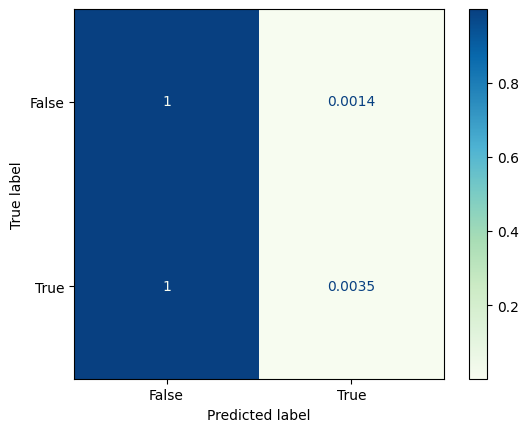

In [45]:
ConfusionMatrixDisplay.from_predictions(y_test, y_predicted_pac, 
                                        im_kw={'cmap':'GnBu'}, 
                                        normalize='true')
plt.show()

### Model 7 | Perceptron 

In [125]:
y_predicted_p = perceptron.predict(X_test)
get_scores(y_predicted_p, 'Perceptron')

,Perceptron
Accuracy,0.838316
Precision,0.675926
Recall,0.013539
F1 Score,0.026545
AUC_ROC,0.506138


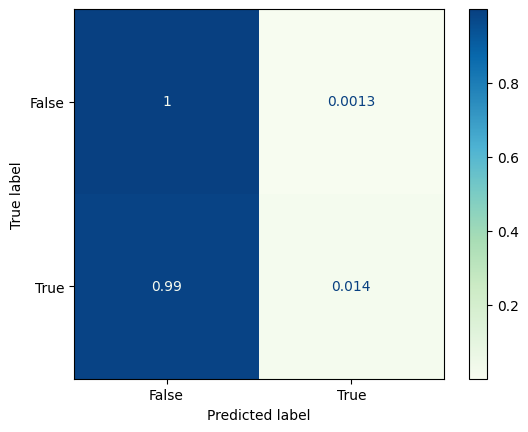

In [126]:
ConfusionMatrixDisplay.from_predictions(y_test, y_predicted_p, 
                                        im_kw={'cmap':'GnBu'}, 
                                        normalize='true')
plt.show()

### Model 8 | Nearest Centroid

In [72]:
y_predicted_nc = nc.predict(X_test)
get_scores(y_predicted_nc, 'Nearest Centroid')

,Nearest Centroid
Accuracy,0.764299
Precision,0.340936
Recall,0.479599
F1 Score,0.398551
AUC_ROC,0.649637


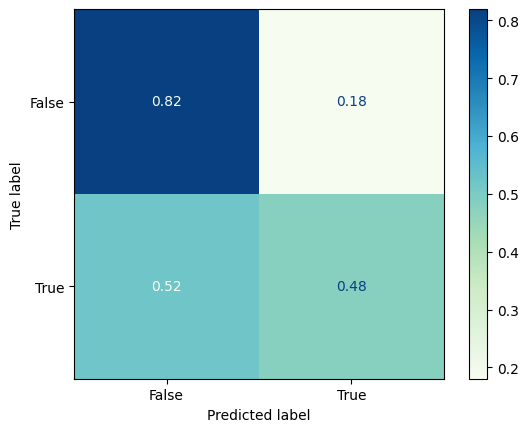

In [73]:
ConfusionMatrixDisplay.from_predictions(y_test, y_predicted_nc, 
                                        im_kw={'cmap':'GnBu'}, 
                                        normalize='true')
plt.show()

In [139]:
y_predicted_abc = abc.predict(X_test)
get_scores(y_predicted_abc, 'AdaBoost Classifier')

,AdaBoost Classifier
Accuracy,0.836323
Precision,0.453642
Recall,0.025408
F1 Score,0.048121
AUC_ROC,0.509728


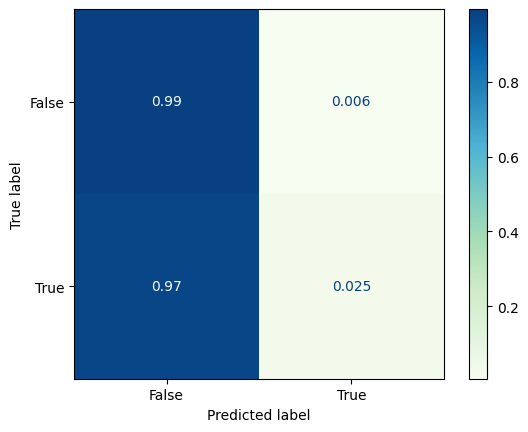

In [140]:
ConfusionMatrixDisplay.from_predictions(y_test, y_predicted_abc, 
                                        im_kw={'cmap':'GnBu'}, 
                                        normalize='true')
plt.show()

# Hyperparameter Tuning

In [99]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import loguniform

#### Nearest Centroid

In [79]:
clf = NearestCentroid()
params = {
    'metric': ['cosine', 'correlation', 'minkowski', 'yule', 'braycurtis', 'sokalmichener', 'kulsinski', 
               'matching', 'canberra', 'sokalsneath', 'russellrao', 'rogerstanimoto', 
               'sqeuclidean', 'euclidean', 'dice', 'chebyshev', 'hamming', 'jaccard']
}
search = GridSearchCV(clf, params, n_jobs=-1)

In [80]:
search.fit(X_train, y_train)
print("Best hyperparameters:", search.best_params_)
print("Accuracy score:", search.best_score_)

Best hyperparameters: {'metric': 'canberra'}
Accuracy score: 0.5840100826749691


#### Perceptron

In [101]:
clf = Perceptron()
params = {
    'alpha': loguniform(0.0001, 10),
    'tol': loguniform(0.0001, 10),
    'eta0': loguniform(0.0001, 5)
}
search = RandomizedSearchCV(
    clf,
    params, 
    n_iter=10, 
    cv=5, 
    n_jobs=-1, 
    random_state=42
)

In [102]:
search.fit(X_train, y_train)
print("Best hyperparameters:", search.best_params_)
print("Accuracy score:", search.best_score_)

Best hyperparameters: {'alpha': 0.007459343285726546, 'eta0': 2.933445395788399, 'tol': 0.45705630998014524}
Accuracy score: 0.6412241189028943


#### Passive Agressive Classifier

In [36]:
clf = PassiveAggressiveClassifier()
params = {
    'C': loguniform(1e-5, 100),
    'max_iter': [1000, 2000, 3000],
    'tol': loguniform(1e-5, 1e-3),
}
search = RandomizedSearchCV(
    clf,
    params, 
    n_iter=10, 
    cv=5, 
    n_jobs=-1, 
    random_state=42
)

In [45]:
search.fit(X_train, y_train)
print("Best hyperparameters:", search.best_params_)
print("Accuracy score:", search.best_score_)

Best hyperparameters: {'C': 2.1215811226877102e-05, 'max_iter': 3000, 'tol': 8.168455894760164e-05}
Accuracy score: 0.670576556386349
